<a href="https://colab.research.google.com/github/vkdnjdldnjsw/2019_cau_oss_hackathon/blob/master/assignment/03/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

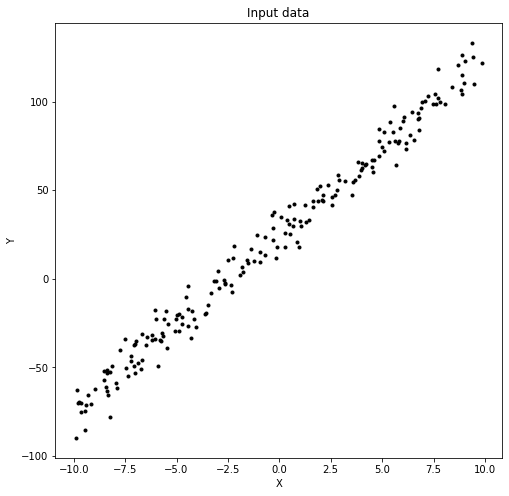

In [3]:
import numpy as np
import matplotlib.pyplot as plt
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

X = data[:, 0]
Y = data[:, 1]

plt.figure(figsize=(8, 8))
plt.title("Input data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, Y, 'k.')
plt.show()


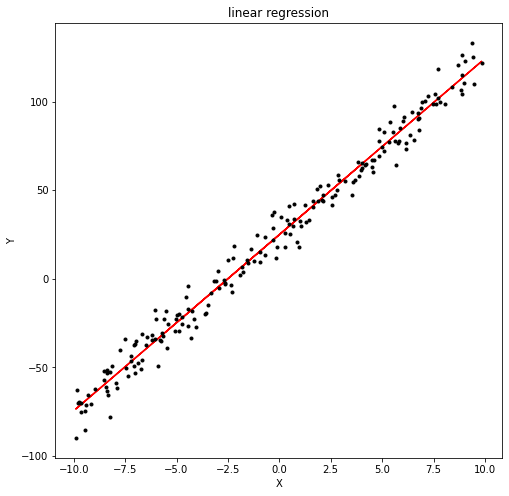

In [4]:
def h(theta0, theta1):
  global X
  return theta0 + theta1 * X

def j(theta0, theta1):
  global Y, m
  return np.sum(np.square((h(theta0, theta1) - Y))) / (2 * m)

def gradientDescent(theta0, theta1):
  global X, Y, previous0, previous1
  previous0 = theta0
  previous1 = theta1
  temp0 = theta0 - learning_rate * np.sum(h(theta0, theta1) - Y) / m
  temp1 = theta1 - learning_rate * np.sum((h(theta0, theta1) - Y) * X) / m
  return (temp0, temp1)

learning_rate = 0.001
previous0 = 0
previous1 = 0
theta0 = -30
theta1 = -30
m = len(X)
theta0s = []
theta1s = []
js = []
theta0s.append(theta0)
theta1s.append(theta1)
js.append(j(theta0, theta1))
while(previous0 != theta0 or previous1 != theta1):
    (theta0, theta1) = gradientDescent(theta0, theta1)
    theta0s.append(theta0)
    theta1s.append(theta1)
    js.append(j(theta0, theta1))


plt.figure(figsize=(8, 8))
plt.title("linear regression")
plt.plot(X,h(theta0, theta1),'r')
plt.plot(X,Y, 'k.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

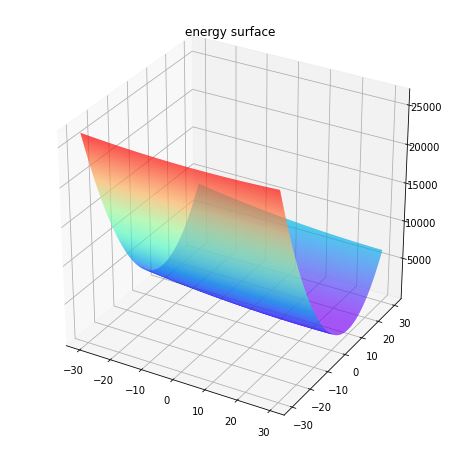

In [5]:
theta0_points = np.arange(-30, 30, 0.1)
theta1_points = np.arange(-30, 30, 0.1)
surf_theta0, surf_theta1 = np.meshgrid(theta0_points, theta1_points)

surf_temp1 = np.reshape(surf_theta0, [-1, 1]) + np.reshape(surf_theta1, [-1, 1]) * X

surf_temp2 = surf_temp1 - np.reshape(Y, [1, -1])
surf_js = np.sum(np.square(surf_temp2), axis=1) / (2*m)

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
points_len = len(theta0_points)
ax.plot_surface(np.reshape(surf_theta0, [points_len, -1]), np.reshape(surf_theta1, [points_len, -1]), np.reshape(surf_js,[points_len, -1]) , rstride=1, cstride=1,
                cmap=plt.cm.rainbow, edgecolor='none')

plt.title("energy surface")
plt.show()



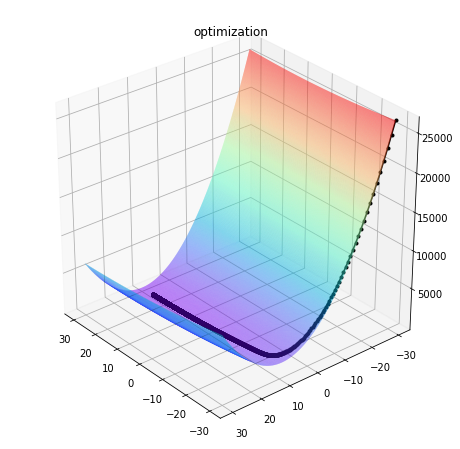

In [26]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.view_init(30, 140)
points_len = len(theta0_points)
ax.plot_surface(np.reshape(surf_theta0, [points_len, -1]), np.reshape(surf_theta1, [points_len, -1]), np.reshape(surf_js,[points_len, -1]) , rstride=1, cstride=1,
                cmap=plt.cm.rainbow, edgecolor='none', alpha=0.6)
ax.plot(theta0s, theta1s, js, 'k.-')
plt.title("optimization")
plt.show()

In [77]:
from matplotlib import rc
import matplotlib.animation as animation
import math
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
points_len = len(theta0_points)
ax.plot_surface(np.reshape(surf_theta0, [points_len, -1]), np.reshape(surf_theta1, [points_len, -1]), np.reshape(surf_js,[points_len, -1]) , rstride=1, cstride=1,
                cmap=plt.cm.rainbow, edgecolor='none', alpha=0.6)
ax.set_xlim(( -30, 30))
ax.set_ylim((-30, 30))
ax.set_zlim((0, 25000))
line, = ax.plot([], [], [], 'k.-')

frame_speed1 = 10
frame_speed2 = 3
frame = int(frame_speed1 + math.log(len(theta0s) - frame_speed1, frame_speed2))
print(frame)
def init():
  line.set_data([], [])
  return (line,)
def animate(i):
  if i <= frame_speed1:
    line.set_data(theta0s[:i], theta1s[:i])
    line.set_3d_properties(js[:i])  
  else :
    line.set_data(theta0s[:frame_speed1 + pow(frame_speed2,i - frame_speed1)], theta1s[:frame_speed1 + pow(frame_speed2,i - frame_speed1)])
    line.set_3d_properties(js[:frame_speed1 + pow(frame_speed2,i - frame_speed1)])
  return  line,

plt.title("optimization")
plt.close()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frame, interval=100, blit=False)

rc('animation', html='jshtml')
anim


19
